In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import skew

In [2]:
df = pd.read_csv("cities_by_hours.csv")         #importing the dataset
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015 1:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,1/1/2015 2:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,1/1/2015 3:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,1/1/2015 4:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,1/1/2015 5:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [3]:
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'C6H6', 'C7H8', 'C8H10', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [4]:
df.shape

(707875, 16)

In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  C6H6        544229 non-null  float64
 12  C7H8        487268 non-null  float64
 13  C8H10       252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [7]:
df.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
C6H6          163646
C7H8          220607
C8H10         455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0] *100

City           0.000000
Datetime       0.000000
PM2.5         20.496274
PM10          41.919407
NO            16.476355
NO2           16.545577
NOx           17.407593
NH3           38.501430
CO            12.222073
SO2           18.417517
O3            18.252940
C6H6          23.117923
C7H8          31.164683
C8H10         64.393996
AQI           18.234858
AQI_Bucket    18.234858
dtype: float64

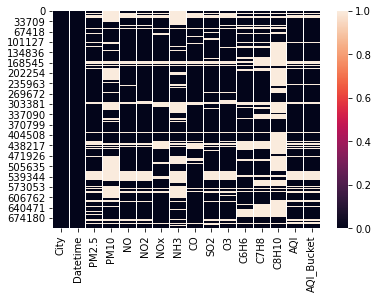

In [9]:
#visualizing the null values using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())

In [10]:
df['year']=pd.DatetimeIndex(df['Datetime']).year
df['month']=pd.DatetimeIndex(df['Datetime']).month
df['time']=pd.DatetimeIndex(df['Datetime']).time
df.head(5)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,year,month,time
0,Ahmedabad,1/1/2015 1:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN,2015,1,01:00:00
1,Ahmedabad,1/1/2015 2:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN,2015,1,02:00:00
2,Ahmedabad,1/1/2015 3:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN,2015,1,03:00:00
3,Ahmedabad,1/1/2015 4:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN,2015,1,04:00:00
4,Ahmedabad,1/1/2015 5:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN,2015,1,05:00:00


In [11]:
  #hence we can see that PM 10 C8H10 NH3 and C7H8 has larger null values so drop these values
df = df.drop(['C8H10','NH3', 'PM10','C7H8'], axis = 1 )

In [12]:
#Handling the null values with median
df["NO"]=df["NO"].fillna(df.NO2.median())
df["PM2.5"]=df["PM2.5"].fillna(df['PM2.5'].median())
df["NO2"]=df["NO2"].fillna(df.NO2.median())
df["NOx"]=df["NOx"].fillna(df.NOx.median())
df["CO"]=df["CO"].fillna(df.CO.median())
df["SO2"]=df["SO2"].fillna(df.SO2.median())
df["O3"]=df["O3"].fillna(df.O3.median())
df["C6H6"]=df["C6H6"].fillna(df.C6H6.median())

In [13]:
df.head()


,City,Datetime,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,AQI,AQI_Bucket,year,month,time
0,Ahmedabad,1/1/2015 1:00,46.42,1.00,40.01,36.37,1.00,122.07,26.24,0.0,NaN,NaN,2015,1,01:00:00
1,Ahmedabad,1/1/2015 2:00,46.42,0.02,27.75,19.73,0.02,85.90,26.24,0.0,NaN,NaN,2015,1,02:00:00
2,Ahmedabad,1/1/2015 3:00,46.42,0.08,19.32,11.08,0.08,52.83,26.24,0.0,NaN,NaN,2015,1,03:00:00
3,Ahmedabad,1/1/2015 4:00,46.42,0.30,16.45,9.20,0.30,39.53,153.58,0.0,NaN,NaN,2015,1,04:00:00
4,Ahmedabad,1/1/2015 5:00,46.42,0.12,14.90,7.85,0.12,32.63,26.24,0.0,NaN,NaN,2015,1,05:00:00


Moderate        198991
Satisfactory    189434
Poor             66654
Very Poor        57455
Good             38611
Severe           27650
Name: AQI_Bucket, dtype: int64

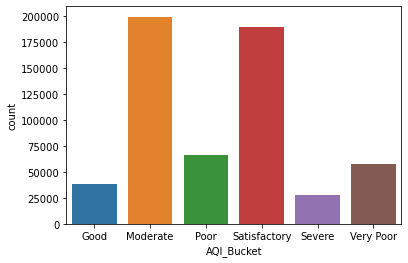

In [14]:
df['AQI_Bucket'] = df['AQI_Bucket'].astype('category')
sns.countplot('AQI_Bucket',data=df)
df['AQI_Bucket'].value_counts()

In [15]:
#grouping the aqi by city and calculate average aqi per city
x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI', ascending = False).head(10))
x=x.reset_index('City')

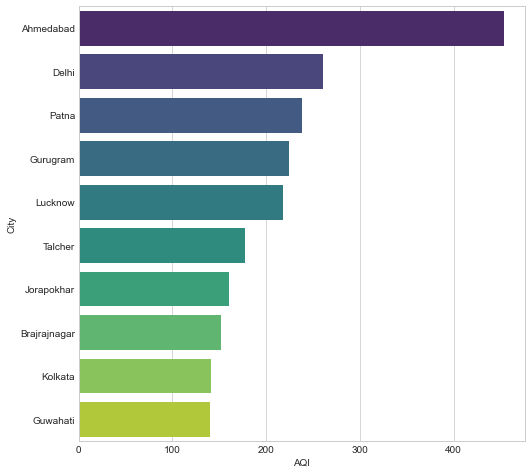

In [16]:
#plot
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,8))
sns.barplot(data= x , x='AQI', y= 'City',orient = 'h' , palette = 'viridis')

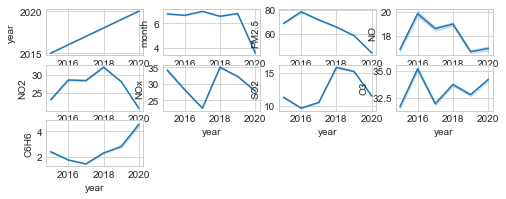

In [17]:
cols = [ 'year','month', 'PM2.5', 'NO', 'NO2', 'NOx', 'SO2',
       'O3', 'C6H6']
x= df.iloc[ : , 2:]
fig = plt.figure(figsize=(8,8))
for i , col in enumerate(cols):
    fig.add_subplot(8, 4, i+1)
    sns.lineplot(x='year',y=col , data=x)

In [18]:
#correlation analysis
df.corr(method = 'pearson')

,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,AQI,year,month
PM2.5,1.000000,0.355576,0.309429,0.335612,0.084330,0.119959,0.062859,0.041570,0.495526,-0.131458,0.035984
NO,0.355576,1.000000,0.403280,0.738354,0.316601,0.121144,-0.106020,0.070459,0.337128,-0.019735,0.023024
NO2,0.309429,0.403280,1.000000,0.570507,0.266388,0.291749,0.070238,0.066212,0.420529,-0.026985,0.026884
NOx,0.335612,0.738354,0.570507,1.000000,0.279375,0.156940,-0.054922,0.083342,0.371504,0.005633,0.015879
CO,0.084330,0.316601,0.266388,0.279375,1.000000,0.242801,-0.041067,0.071207,0.564945,-0.024691,-0.002060
SO2,0.119959,0.121144,0.291749,0.156940,0.242801,1.000000,0.103699,0.033171,0.353252,0.064437,-0.019260
O3,0.062859,-0.106020,0.070238,-0.054922,-0.041067,0.103699,1.000000,-0.000754,0.088499,0.009115,-0.059531
C6H6,0.041570,0.070459,0.066212,0.083342,0.071207,0.033171,-0.000754,1.000000,0.057004,0.049788,-0.008709
AQI,0.495526,0.337128,0.420529,0.371504,0.564945,0.353252,0.088499,0.057004,1.000000,-0.163006,0.018654
year,-0.131458,-0.019735,-0.026985,0.005633,-0.024691,0.064437,0.009115,0.049788,-0.163006,1.000000,-0.203493


Text(0.5, 1.0, 'Correlation Analysis')

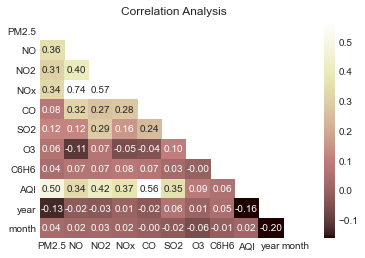

In [19]:
mask = np.triu(df.corr(method = 'pearson'))
sns.heatmap(df.corr(method = 'pearson'),annot = True , fmt = '0.2f', mask = mask, robust = True , cmap = 'pink')
plt.title('Correlation Analysis')

Text(0.5, 0, 'Features')

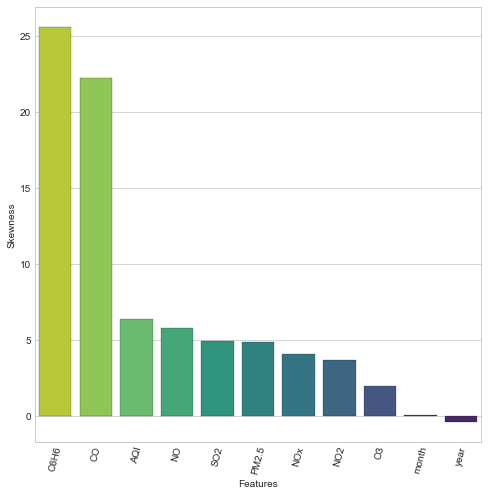

In [20]:
skew = pd.DataFrame(df.skew().sort_values(ascending = False))
skew.columns = ['Skewness']

plt.figure(figsize = (8,8))
plt.xticks(rotation =75)
sns.barplot(x=skew.index , y = 'Skewness', data = skew, edgecolor = 'black', linewidth=0.2 , palette = 'viridis_r')
plt.xlabel('Features')

In [21]:
df.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [22]:
#plotting the average AQI ove years which have AQI greater than 500
df['City'][df['AQI']>= 500].value_counts()
cols = ['Ahmedabad','Amritsar', 'Bengaluru','Bhopal','Chandigarh', 'Chennai','Hyderabad','Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Delhi']

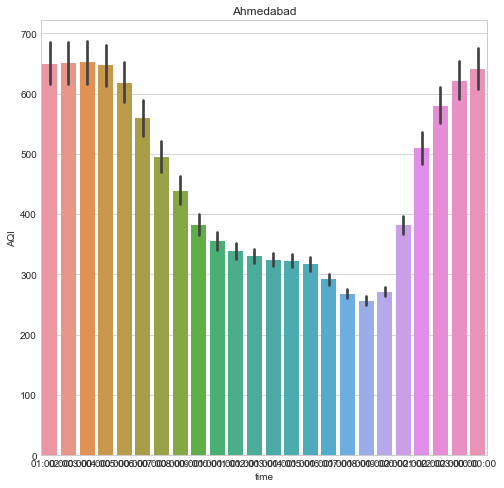

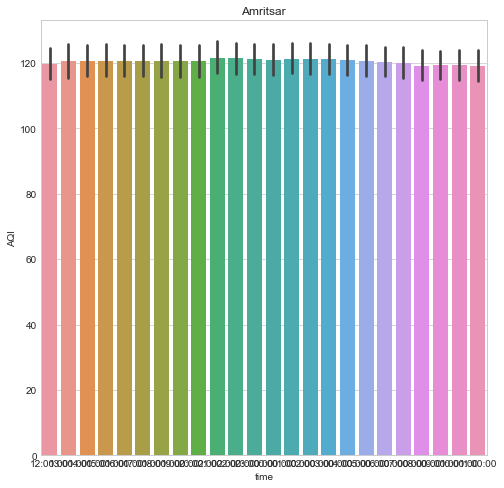

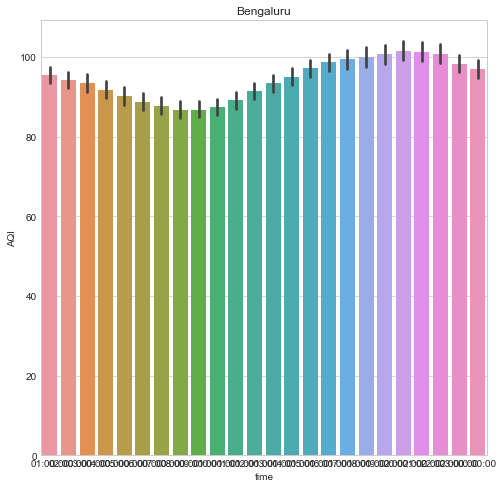

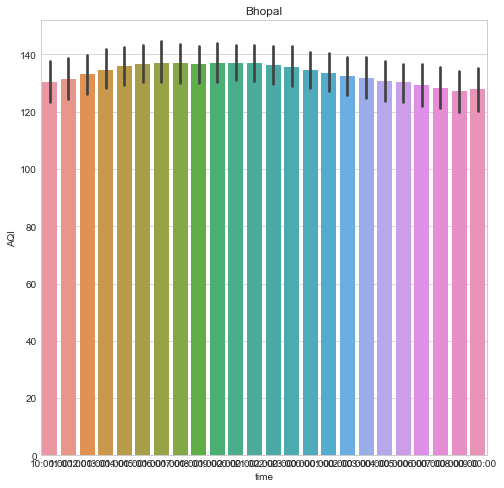

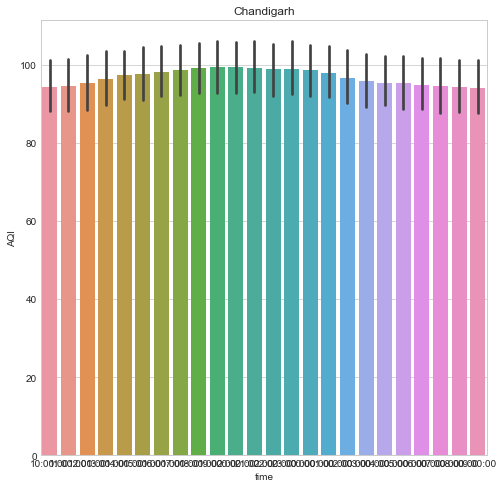

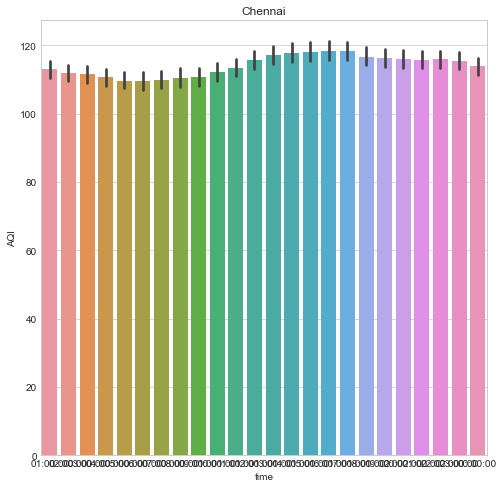

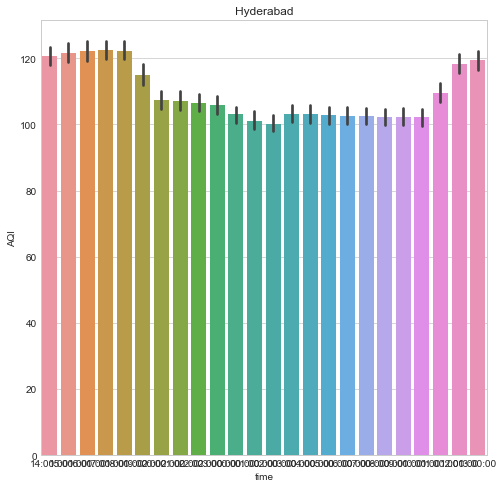

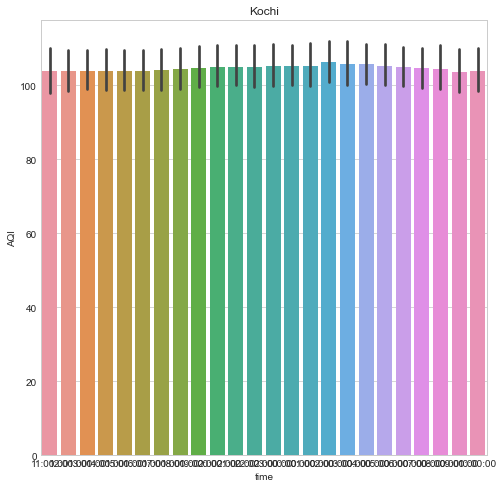

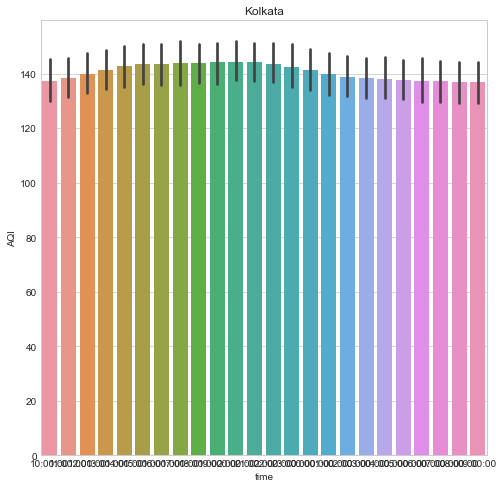

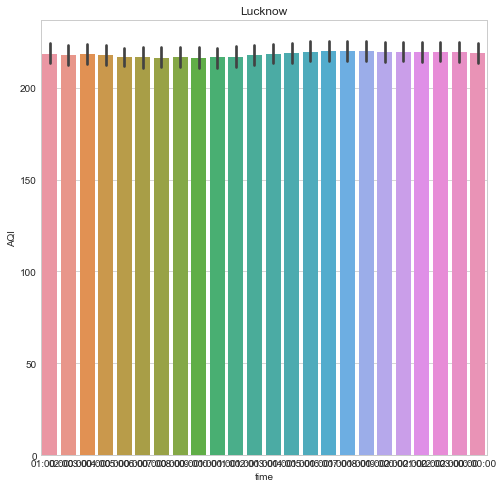

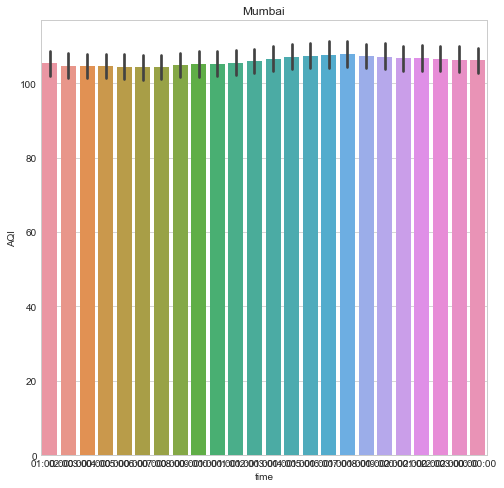

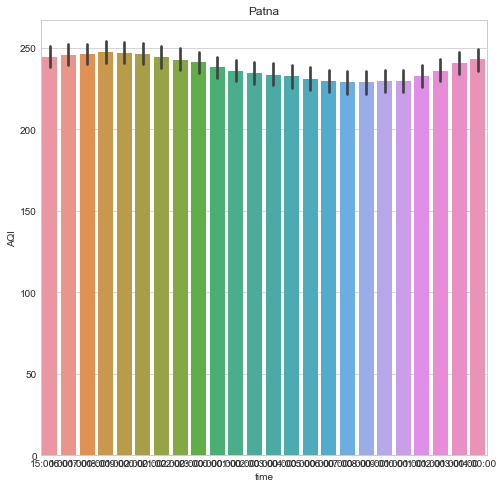

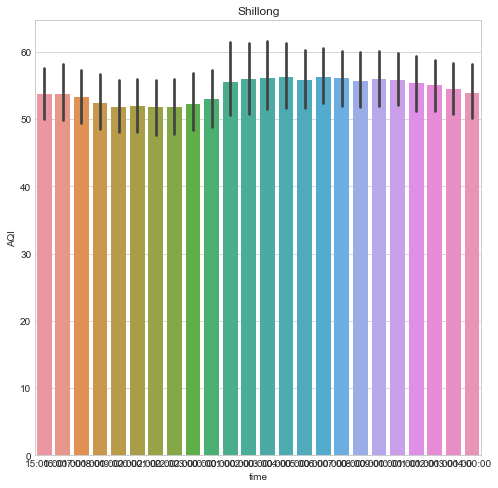

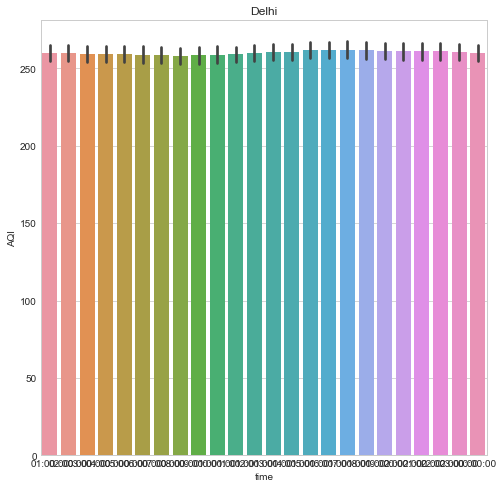

In [23]:
for col in cols:
    plt.figure(figsize= (8,8))
    x=df[df['City']== col]
    sns.barplot(x='time', y = 'AQI', data=x)
    plt.title(col)

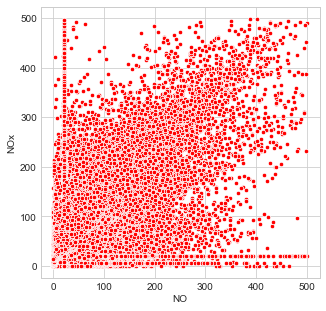

In [24]:
plt.figure(figsize=(5,5))
sns.scatterplot(x ='NO',y='NOx',data=df , s=20, color = 'red')

In [25]:
cols = [ 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2',
       'O3', 'C6H6']

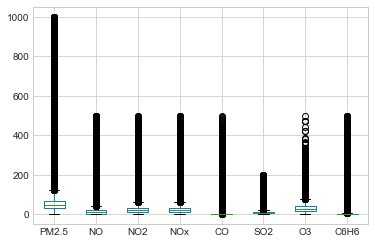

In [26]:
boxplot = df.boxplot(column = cols)       #outliers are present only in O3 column 

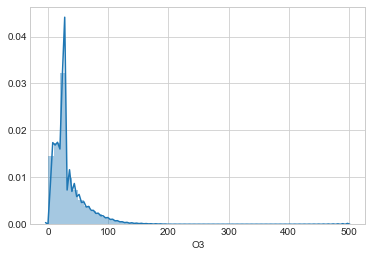

In [27]:
sns.distplot(df['O3'])

# Removing outliers from O3 column

In [28]:
df.O3.describe()

count    707875.000000
mean         33.236714
std          27.151205
min           0.010000
25%          16.150000
50%          26.240000
75%          41.500000
max         497.620000
Name: O3, dtype: float64

# REMOVING THE OUTLIERS #Using Z-Score Z=(X-mean)/Std

In [29]:
df['O3']=(df.O3 - df.O3.mean()) /df.O3.std()

In [30]:
df[df['O3']>3]

,City,Datetime,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,AQI,AQI_Bucket,year,month,time
3,Ahmedabad,1/1/2015 4:00,46.42,0.30,16.45,9.20,0.30,39.53,4.432337,0.00,NaN,NaN,2015,1,04:00:00
6,Ahmedabad,1/1/2015 7:00,46.42,0.45,15.94,12.47,0.45,27.41,5.845902,0.00,NaN,NaN,2015,1,07:00:00
7,Ahmedabad,1/1/2015 8:00,46.42,1.03,16.66,16.48,1.03,20.92,5.302648,0.00,NaN,NaN,2015,1,08:00:00
8,Ahmedabad,1/1/2015 9:00,46.42,1.47,16.25,18.02,1.47,16.45,3.272167,0.00,NaN,NaN,2015,1,09:00:00
16,Ahmedabad,1/1/2015 17:00,46.42,0.80,19.04,20.00,0.80,16.14,5.686057,0.00,NaN,NaN,2015,1,17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704240,Visakhapatnam,1/31/2020 14:00,58.50,2.35,12.00,8.32,0.85,7.58,3.436064,2.70,139.0,Moderate,2020,1,14:00:00
704242,Visakhapatnam,1/31/2020 16:00,51.00,2.73,10.60,7.85,1.03,6.90,3.323362,2.27,139.0,Moderate,2020,1,16:00:00
705390,Visakhapatnam,3/19/2020 12:00,41.00,2.95,29.10,17.85,1.25,2.35,4.578555,5.00,185.0,Moderate,2020,3,12:00:00
705391,Visakhapatnam,3/19/2020 13:00,43.25,2.77,20.73,13.28,0.80,4.95,4.393665,4.52,185.0,Moderate,2020,3,13:00:00


In [31]:
df[df['O3']<-3]

,City,Datetime,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,AQI,AQI_Bucket,year,month,time


In [37]:
df = df[(df.O3>-3) & (df.O3<3)]
df.shape

(694658, 15)

In [38]:
df.shape

(694658, 15)

In [39]:
df.head()

,City,Datetime,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,AQI,AQI_Bucket,year,month,time
0,Ahmedabad,1/1/2015 1:00,46.42,1.00,40.01,36.37,1.00,122.07,-0.257694,0.0,NaN,NaN,2015,1,01:00:00
1,Ahmedabad,1/1/2015 2:00,46.42,0.02,27.75,19.73,0.02,85.90,-0.257694,0.0,NaN,NaN,2015,1,02:00:00
2,Ahmedabad,1/1/2015 3:00,46.42,0.08,19.32,11.08,0.08,52.83,-0.257694,0.0,NaN,NaN,2015,1,03:00:00
4,Ahmedabad,1/1/2015 5:00,46.42,0.12,14.90,7.85,0.12,32.63,-0.257694,0.0,NaN,NaN,2015,1,05:00:00
5,Ahmedabad,1/1/2015 6:00,46.42,0.33,15.95,10.82,0.33,29.87,1.142243,0.0,NaN,NaN,2015,1,06:00:00


# Hence all outliers from the dataset are removed

In [35]:
cols = [ 'PM2.5', 'NO', 'NO2', 'NOx', 'CO','SO2',
       'O3', 'C6H6']

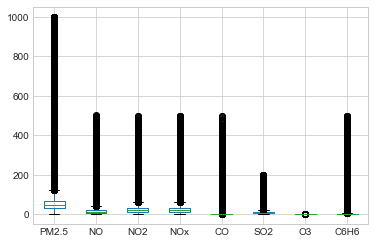

In [36]:
boxplot = df.boxplot(column = cols)

# Training of model

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df.shape

(694658, 15)

In [44]:
df1 = df.dropna()

In [45]:
df1.shape

(566015, 15)

In [53]:
cols = ['City','Datetime', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2',
       'O3', 'C6H6','AQI','AQI_Bucket']
df1 = df1.reindex(columns=cols)
df1

,City,Datetime,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,AQI,AQI_Bucket
680,Ahmedabad,1/29/2015 9:00,80.47,1.42,21.90,20.65,1.42,32.26,0.496232,0.00,288.0,Poor
681,Ahmedabad,1/29/2015 10:00,87.80,2.03,19.87,22.22,2.03,78.95,-0.418277,0.00,181.0,Moderate
682,Ahmedabad,1/29/2015 11:00,90.53,1.72,20.11,22.12,1.72,95.86,1.268205,0.00,182.0,Moderate
683,Ahmedabad,1/29/2015 12:00,83.53,0.75,16.35,16.48,0.75,44.91,2.050859,0.00,182.0,Moderate
685,Ahmedabad,1/29/2015 14:00,67.57,0.63,15.84,15.12,0.63,27.26,1.831347,0.00,176.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,6/30/2020 20:00,9.50,2.75,25.57,15.85,0.62,8.37,-0.202080,0.86,51.0,Satisfactory
707871,Visakhapatnam,6/30/2020 21:00,17.25,3.62,33.20,20.62,0.76,2.02,-0.282003,0.86,51.0,Satisfactory
707872,Visakhapatnam,6/30/2020 22:00,36.00,2.20,30.80,18.20,0.58,1.77,-0.261009,0.86,50.0,Good
707873,Visakhapatnam,6/30/2020 23:00,15.75,1.02,28.90,16.00,0.49,0.75,-0.641471,0.86,50.0,Good


In [54]:
X=df1.iloc[: , 2: -2]
Y=df1.iloc[:,-2:-1]

In [55]:
X


,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6
680,80.47,1.42,21.90,20.65,1.42,32.26,0.496232,0.00
681,87.80,2.03,19.87,22.22,2.03,78.95,-0.418277,0.00
682,90.53,1.72,20.11,22.12,1.72,95.86,1.268205,0.00
683,83.53,0.75,16.35,16.48,0.75,44.91,2.050859,0.00
685,67.57,0.63,15.84,15.12,0.63,27.26,1.831347,0.00
...,...,...,...,...,...,...,...,...
707870,9.50,2.75,25.57,15.85,0.62,8.37,-0.202080,0.86
707871,17.25,3.62,33.20,20.62,0.76,2.02,-0.282003,0.86
707872,36.00,2.20,30.80,18.20,0.58,1.77,-0.261009,0.86
707873,15.75,1.02,28.90,16.00,0.49,0.75,-0.641471,0.86


In [56]:
Y

,AQI
680,288.0
681,181.0
682,182.0
683,182.0
685,176.0
...,...
707870,51.0
707871,51.0
707872,50.0
707873,50.0


In [57]:
from sklearn import linear_model

from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 0)

In [58]:
from sklearn.linear_model import LinearRegression
regr =LinearRegression()
regr.fit(X_train,Y_train)

LinearRegression()

In [59]:
regr.coef_

array([[ 9.15529255e-01, -3.08139116e-01,  6.64534478e-01,
         2.04562976e-01,  6.93880716e+00,  1.33356310e+00,
         9.09750092e+00,  2.42116755e-03]])

In [60]:
regr.intercept_

array([51.21120821])

In [61]:
y_pred = regr.predict(X_test)         #predicting the test set result

In [62]:
#R square 
#this gives the goodness of fit of a model 
#R square equal to 1 indicates that regression prediction perfectly fit the data
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)

In [63]:
score

0.5636960072442593